### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-14,476135,5320822,800343,616970,296721,147085,135049,286023,121817,106685,88542,129205,130831,4849,201848
2021-12-15,476478,5329879,802510,617271,297188,147249,135178,287135,121968,107207,88619,129256,130883,4849,201902
2021-12-16,476869,5337172,803652,617271,297356,147396,135301,288240,122156,107655,88667,129295,130946,4849,201992
2021-12-17,476869,5344177,805823,617395,297356,147509,135421,289292,122318,107812,88708,129345,130992,4849,202076
2021-12-18,477158,5349699,806273,617395,297568,147634,135544,290340,122403,108238,88708,129399,131033,4849,202154


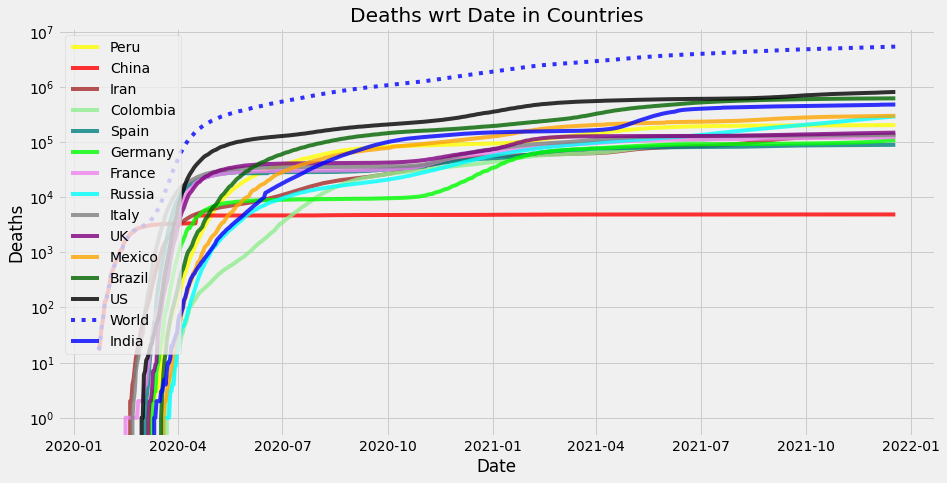

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-14,6984,673703,113749,18716,771,60067,20665,27910,63416,52233,26136,1859,2784,74,945
2021-12-15,7974,736191,141205,5446,5651,78144,23190,28011,65714,56902,27140,2066,2651,76,1478
2021-12-16,7447,752869,138885,0,2627,88042,26104,28158,60905,51400,28900,1720,2500,86,1660
2021-12-17,0,710028,193305,3720,0,92907,28615,27427,58152,15716,33359,1803,2196,132,1724
2021-12-18,7145,545572,66887,0,2750,89190,28057,27131,58536,55603,0,2016,1361,88,3559


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-14,8957,581548,106536,7834,2474,47457,13865,32027,36791,47276,12163,2071,4168,69,1275
2021-12-15,8891,591858,108847,7675,2686,49503,14487,31759,38719,47918,13162,2070,4067,69,1289
2021-12-16,8795,602592,110850,7163,2682,52072,15261,31519,40198,48150,14211,2047,3963,71,1313
2021-12-17,8209,609754,116347,6934,2503,54794,16151,31246,41395,45988,15487,2031,3845,75,1341
2021-12-18,8138,605475,113050,6471,2520,57087,16945,30972,42538,46629,14455,2030,3679,75,1488


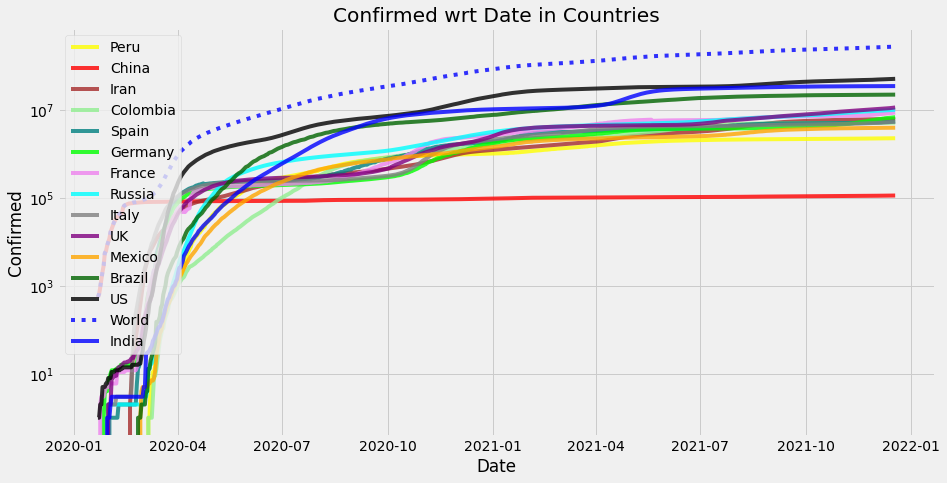

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-14,247,8269,1629,513,49,150,120,1114,158,454,58,42,67,0,78
2021-12-15,343,9057,2167,301,467,164,129,1112,151,522,77,51,52,0,54
2021-12-16,391,7293,1142,0,168,147,123,1105,188,448,48,39,63,0,90
2021-12-17,0,7005,2171,124,0,113,120,1052,162,157,41,50,46,0,84
2021-12-18,289,5522,450,0,212,125,123,1048,85,426,0,54,41,0,78


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-14,404.45,7162.76,1244.54,168.77,170.88,114.11,87.95,1145.86,121.65,347.30,38.70,47.87,73.36,0.0,48.55
2021-12-15,396.77,7399.54,1359.85,185.30,207.89,120.35,93.08,1141.63,125.32,369.13,43.49,48.26,70.69,0.0,49.23
2021-12-16,396.05,7386.22,1332.62,162.14,202.91,123.68,96.82,1137.05,133.15,378.99,44.05,47.10,69.73,0.0,54.33
2021-12-17,346.54,7338.57,1437.42,157.37,177.54,122.35,99.72,1126.42,136.76,351.24,43.67,47.46,66.76,0.0,58.04
2021-12-18,339.35,7111.50,1313.99,137.70,181.85,122.68,102.63,1116.62,130.29,360.59,38.21,48.28,63.54,0.0,60.53


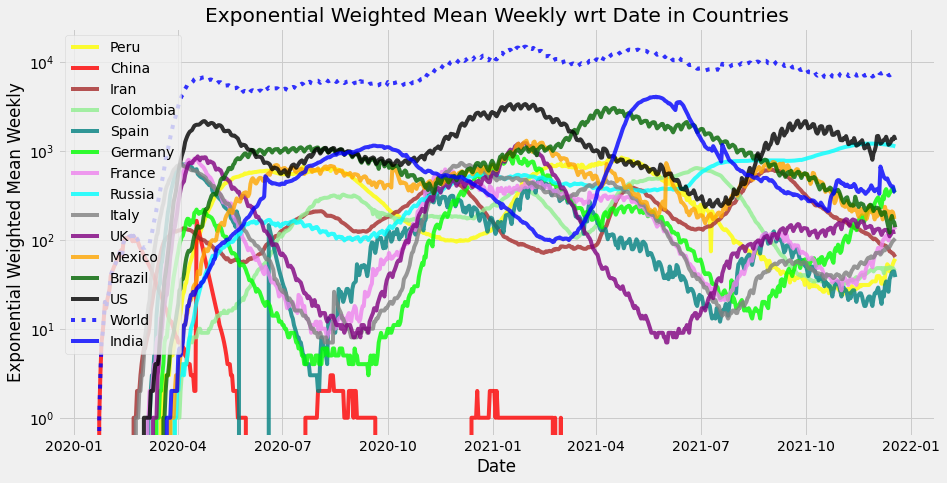

In [18]:
plotter(np.round(AVG), name)

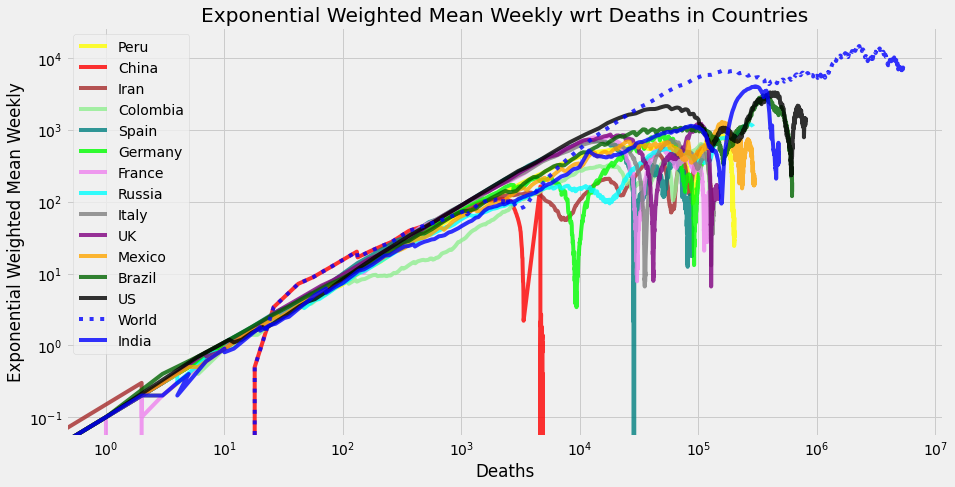

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

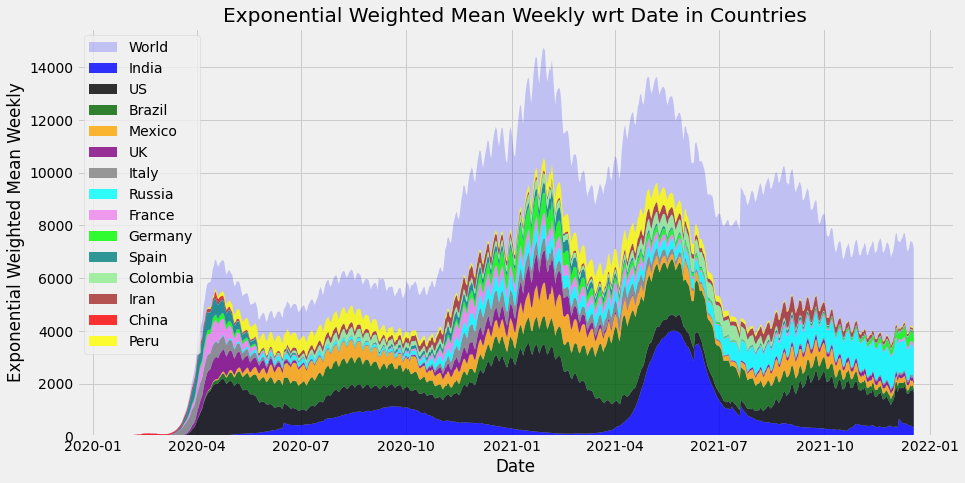

In [20]:
stackplotter(AVG, name)

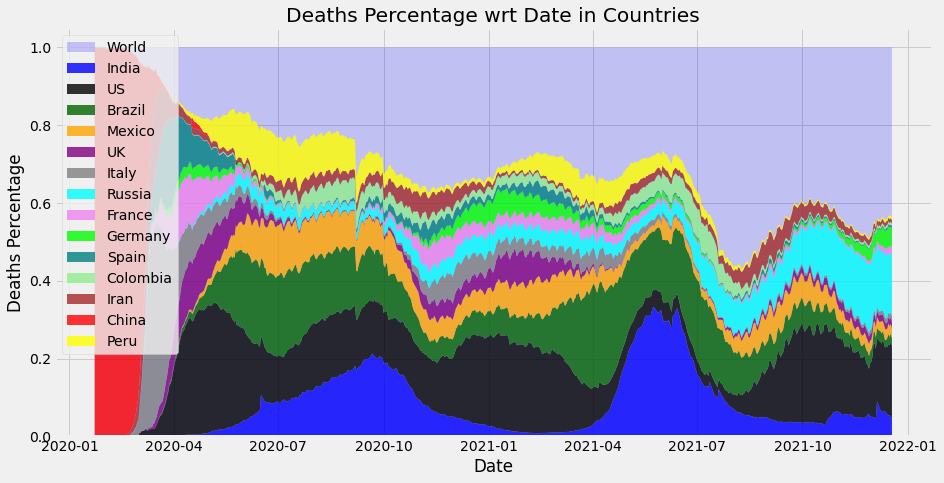

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

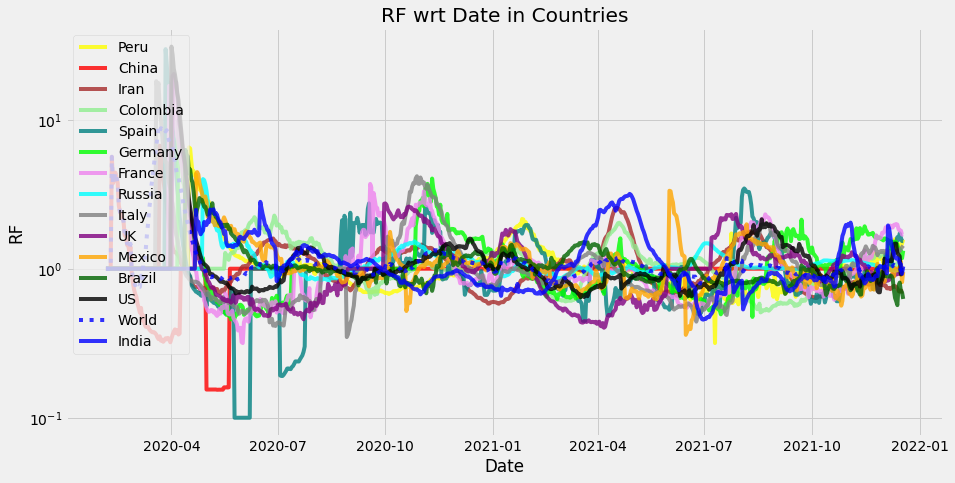

In [23]:
plotter(Reproductivity, 'RF')

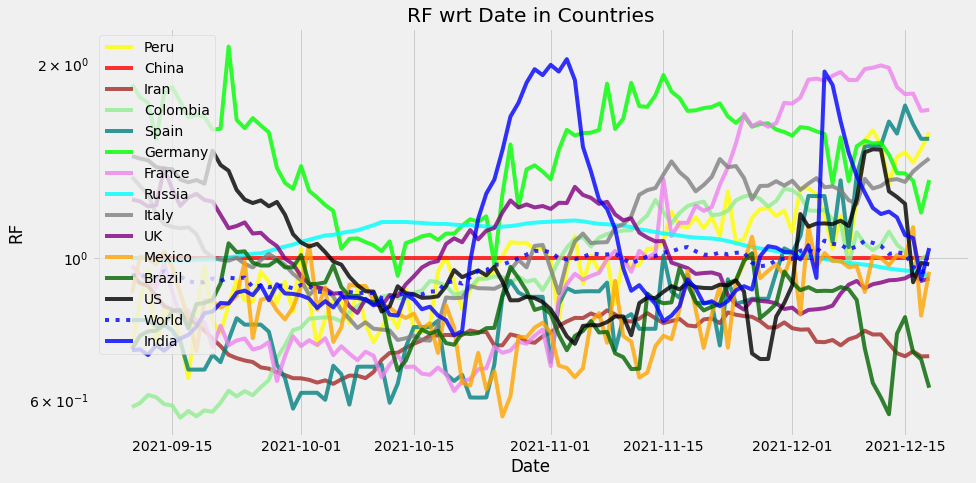

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

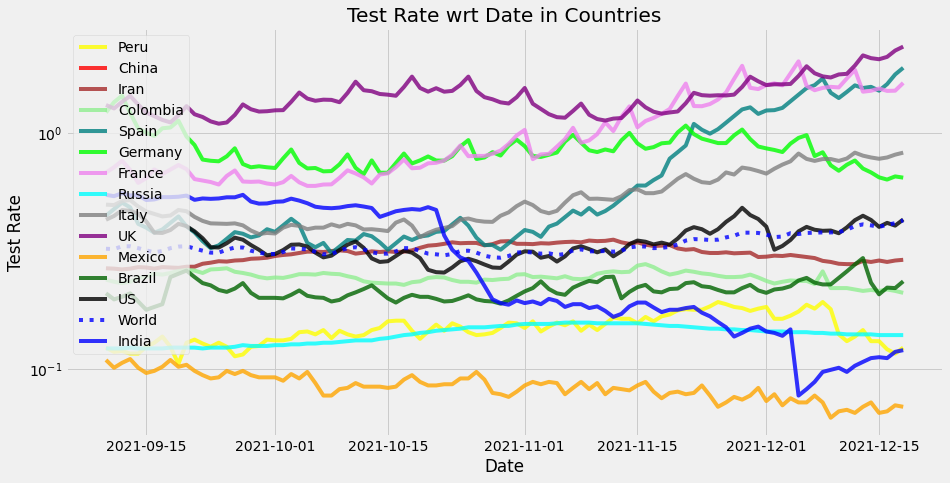

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

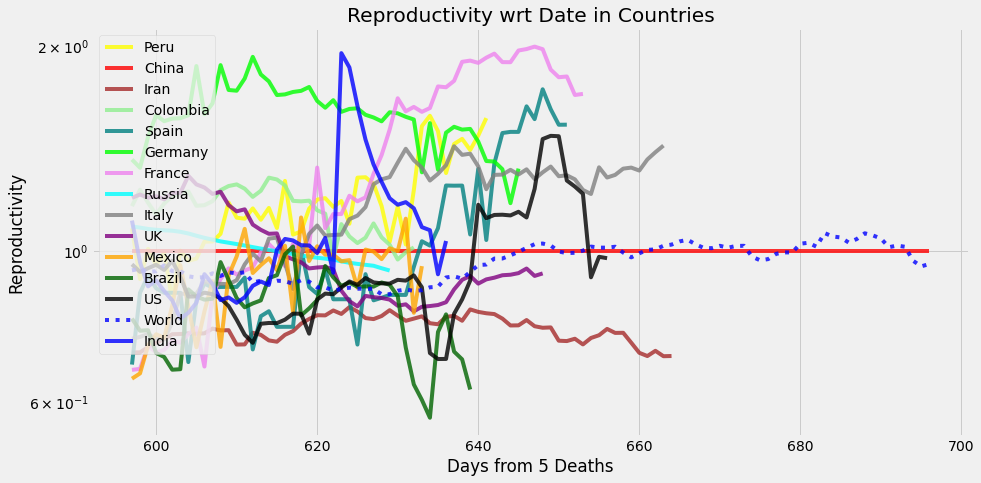

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

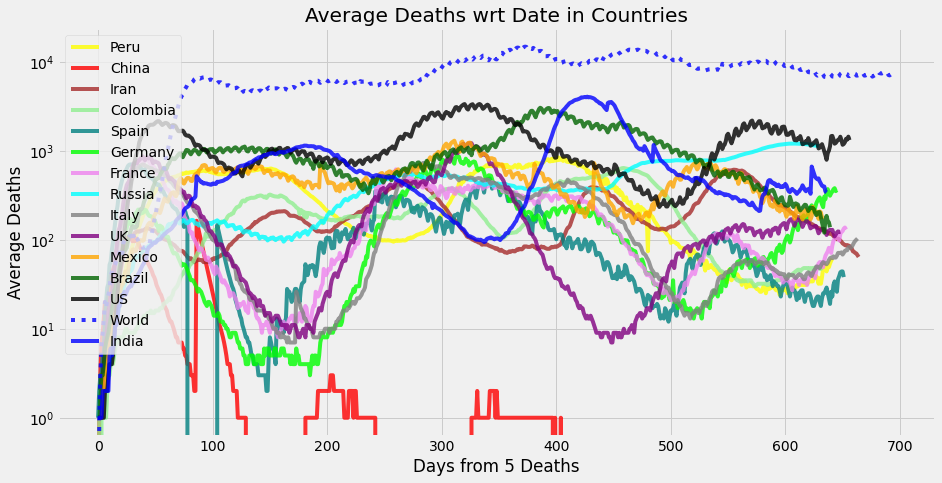

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

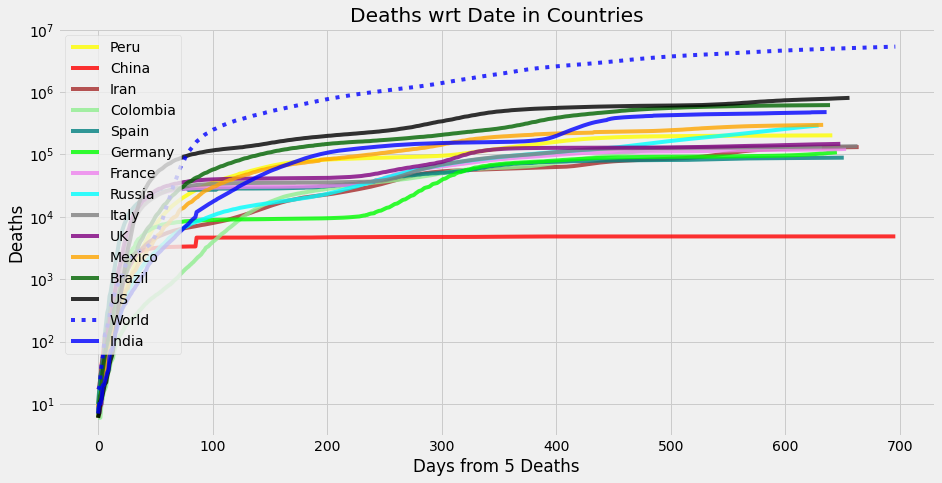

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5349699,5522,6848.43,7111.50,0.9572,274213886,0.426,605475,1069.94
US,806273,450,1299.14,1313.99,0.9763,50773620,0.430,113050,161.25
Brazil,617395,0,134.00,137.70,0.6268,22204941,0.235,6471,123.48
India,477158,289,246.29,339.35,1.0347,34733194,0.120,8138,95.43
Mexico,297568,212,169.00,181.85,0.9505,3930015,0.069,2520,59.51
Russia,290340,1048,1089.57,1116.62,0.9365,10009866,0.139,30972,58.07
Peru,202154,78,60.14,60.53,1.5665,2263739,0.123,1488,40.43
UK,147634,125,112.86,122.68,0.9274,11343594,2.327,57087,29.53
Indonesia,143998,12,9.86,9.73,1.0000,4260380,NaN,294,28.80


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5349699,5522,6848.43,7111.50,0.9572,274213886,0.426,605475,1069.94
US,806273,450,1299.14,1313.99,0.9763,50773620,0.430,113050,161.25
Russia,290340,1048,1089.57,1116.62,0.9365,10009866,0.139,30972,58.07
Poland,91415,543,428.71,450.06,1.2030,3942864,0.227,20439,18.28
Germany,108238,426,370.86,360.59,1.3210,6813287,0.647,46629,21.65
Ukraine,98769,316,334.57,399.16,0.7136,3781506,0.141,11231,19.75
Vietnam,29351,248,248.57,230.37,1.3681,1524368,0.327,15079,5.87
India,477158,289,246.29,339.35,1.0347,34733194,0.120,8138,95.43
Mexico,297568,212,169.00,181.85,0.9505,3930015,0.069,2520,59.51


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5349699


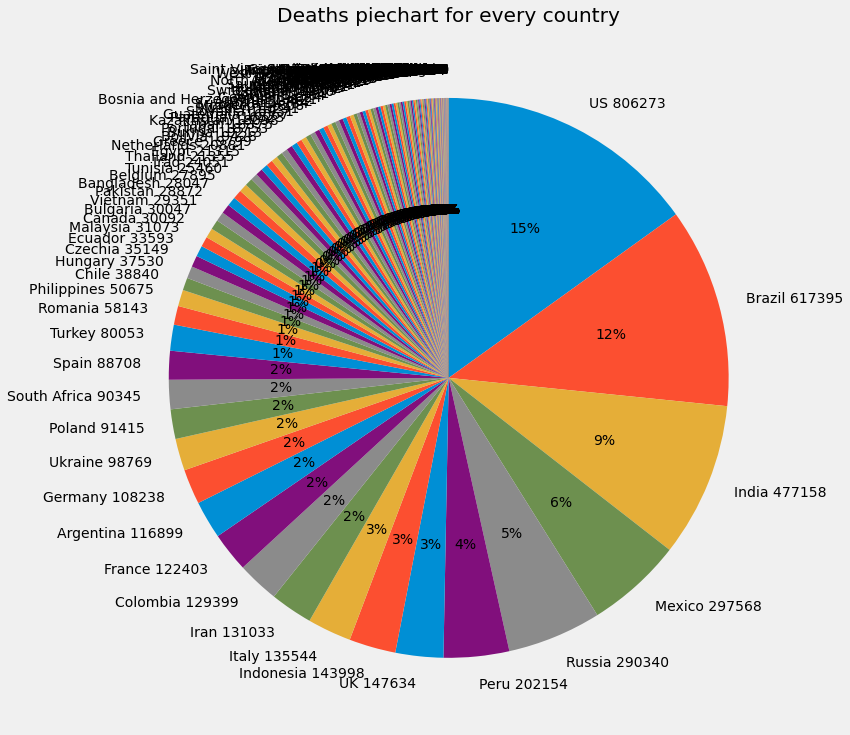

In [35]:
piechart('Deaths')

World total:  6848


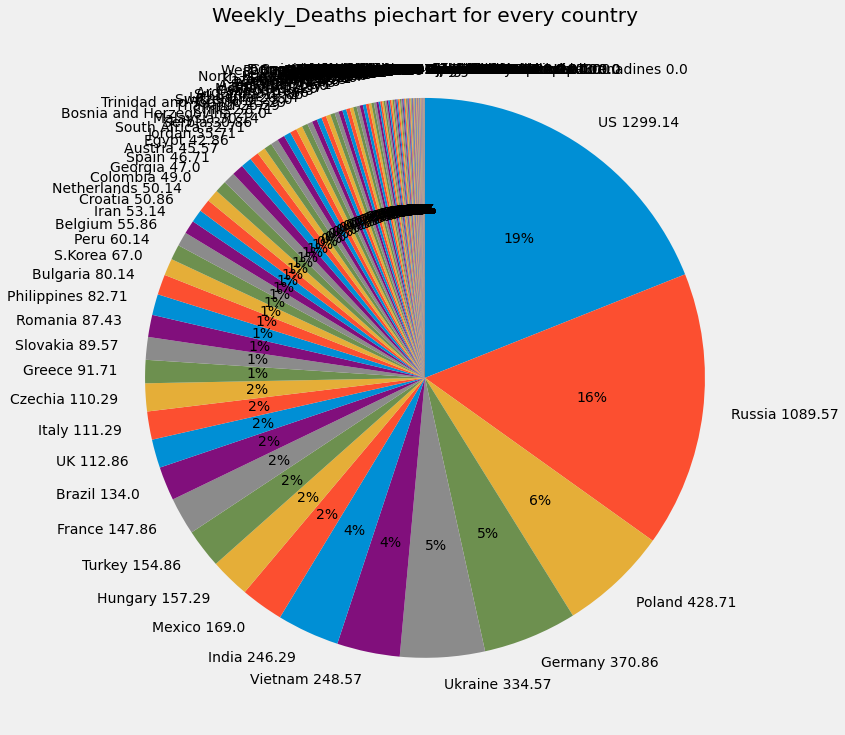

In [36]:
piechart('Weekly_Deaths')

World total:  5522


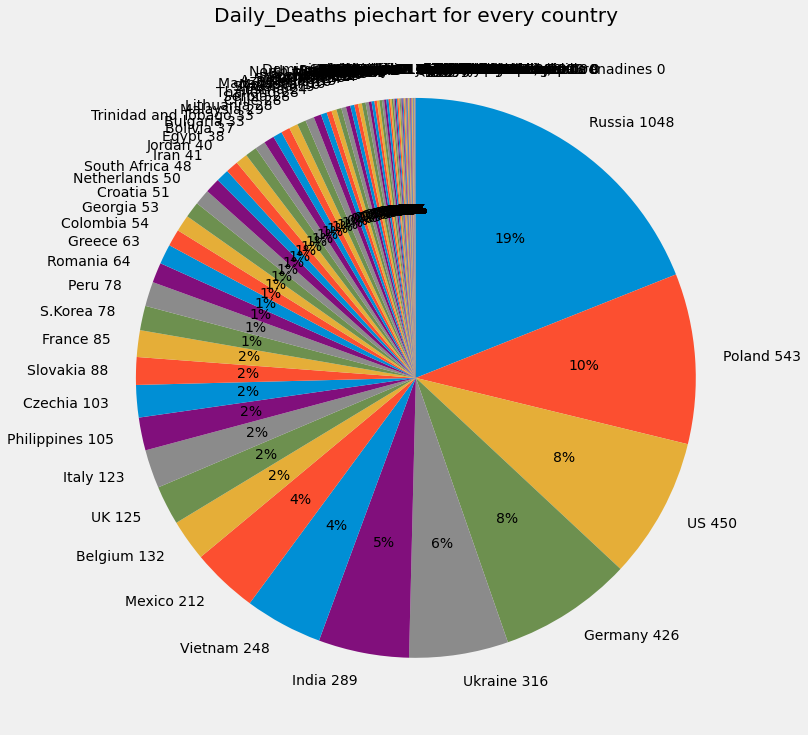

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-12-19


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1069939800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 459823c] `date` update
 1 file changed, 2132 insertions(+), 2131 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   96d4f5c..459823c  master -> master
